In [18]:
data_folder = "./data/zhwiki/text"

In [19]:
import os

In [20]:
os.path.exists(data_folder)

True

In [21]:
# recursively get all the files under one directory
def iterate_over_dir(dir_name):
    all_files = []
    
    for file in os.listdir(dir_name):
        file_full_path = dir_name + '/' + file
        if os.path.isdir(file_full_path):
            all_files += iterate_over_dir(file_full_path)
        else:
            all_files += [file_full_path]
    
    return all_files

In [22]:
len(iterate_over_dir(data_folder))

1298

In [23]:
all_wiki_file_paths = iterate_over_dir(data_folder)

In [24]:
# dir to store simplified chinese version
dir_after_parse = './data/zhwiki/clean'

In [8]:
# 繁体转化为简体
from langconv import *

def convert_to_simplified(wiki_file_path):
    contents = ""
    
    file_name = ''.join(wiki_file_path.split("/")[-2:])
    new_file_path = dir_after_parse + "/" + file_name
    new_file_obj = open(new_file_path, "w+", encoding='utf8')
    
    with open(wiki_file_path, 'r', encoding="utf8") as f:
        for line in f:
            if line.startswith("<doc") or line.startswith("</doc>"): continue
            if not line.strip(): continue
            simplified_line = Converter('zh-hans').convert(line)
            contents += simplified_line
        
    new_file_obj.write(contents)
        
    new_file_obj.close()


def convert_all_to_simplified():
    i = 0
    
    for file_path in all_wiki_file_paths:
        convert_to_simplified(file_path)
        i += 1
        if i % 10 == 0:
            print (i)

In [9]:
''.join(all_wiki_file_paths[0].split("/")[-2:])

'AAwiki_00'

In [10]:
convert_all_to_simplified()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290


In [25]:
cut_words_file = "./data/cut_words.txt"

In [26]:
import jieba

def cut_to_words(file_path):
    
    cut_words_file_obj = open(cut_words_file, "a+", encoding="utf8")
    
    with open(file_path, "r", encoding="utf8") as f:
        cut_words_str = ""
        
        for line in f:
            words = list(jieba.cut(line))
            if words:
                cut_words_str = cut_words_str + (" ".join(words))
    
    
    cut_words_file_obj.write(cut_words_str)
    cut_words_file_obj.close()

In [18]:
def cut_all_to_words():
    all_clean_files = iterate_over_dir(dir_after_parse)
    
    i = 0
    for file_path in all_clean_files:
        cut_to_words(file_path)
        i += 1
        if i % 10 == 0:
            print(i)

In [19]:
cut_all_to_words()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290


In [2]:
from gensim.models import word2vec

In [4]:
sentences = word2vec.LineSentence(cut_words_file)
model = word2vec.Word2Vec(sentences=sentences, size=100, window=5, min_count=5, workers=4)

NameError: name 'cut_words_file' is not defined

In [4]:
# save the model for later use
model.save("./data/word2vec.model")

NameError: name 'model' is not defined

In [3]:
model = word2vec.Word2Vec.load("./data/word2vec.model")

In [4]:
model.wv['数学']

array([ 0.01484486, -0.8072568 , -0.2822899 , -4.70669   , -0.4845129 ,
        0.7017362 , -0.85114235, -1.1780807 , -5.24441   , -1.6772665 ,
       -0.2615523 , -2.4427776 ,  1.5934801 ,  1.6727566 ,  2.999995  ,
       -0.01217941,  0.09348573, -0.6646273 , -1.0876671 ,  2.41148   ,
       -0.40708038,  2.988559  ,  1.5656604 ,  3.2017305 , -1.675182  ,
       -1.2288843 ,  1.8236387 ,  2.7249444 , -1.7799258 ,  2.0163193 ,
       -1.0311694 , -3.0657086 ,  4.5485563 ,  3.002686  , -0.693612  ,
       -3.5972    , -2.8837633 ,  0.15148057, -3.1729004 , -2.1548698 ,
        0.96196115,  2.346864  , -0.15316902, -2.73824   ,  1.4881155 ,
        0.02809573,  2.0515625 ,  0.38744634, -1.6321605 ,  0.36581916,
       -1.8086996 , -0.68288136, -3.6792645 ,  1.9731126 , -0.14114796,
       -3.9601338 ,  1.7320317 ,  0.22155571,  1.0957778 , -3.4647195 ,
       -0.3458811 ,  1.4069607 ,  2.1545537 , -2.617418  ,  1.2700566 ,
        3.224807  ,  0.46936953, -0.08890346,  5.566728  , -2.09

In [5]:
model.wv['数学'].shape

(100,)

In [6]:
model.wv.most_similar("数学")

[('微积分', 0.8532705903053284),
 ('概率论', 0.8267503976821899),
 ('数学分析', 0.8265663981437683),
 ('逻辑学', 0.819031298160553),
 ('数理逻辑', 0.8073157072067261),
 ('拓扑学', 0.7957483530044556),
 ('计算机科学', 0.794941782951355),
 ('语言学', 0.7934921979904175),
 ('理论物理学', 0.786392092704773),
 ('数论', 0.7831383347511292)]

In [7]:
model.wv.most_similar("人工智能")

[('人工智慧', 0.8709152936935425),
 ('AI', 0.8583074808120728),
 ('智能', 0.7521029710769653),
 ('计算机', 0.7476472854614258),
 ('机器人学', 0.7470070719718933),
 ('虚拟现实', 0.7416224479675293),
 ('软件开发', 0.7306064367294312),
 ('机器人', 0.7303838729858398),
 ('计算机技术', 0.7194675207138062),
 ('编程', 0.7188045978546143)]

In [8]:
model.wv.similarity("四川", "成都")

0.74739397

In [29]:
model.wv.similarity("四川", "数学")

-0.09244228

In [11]:
# Visualize using T-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family']='sans-serif'
plt.rcParams['axes.unicode_minus'] = False

In [14]:
len(model.wv.vocab)

679123

In [15]:
model['数学']

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


array([ 0.01484486, -0.8072568 , -0.2822899 , -4.70669   , -0.4845129 ,
        0.7017362 , -0.85114235, -1.1780807 , -5.24441   , -1.6772665 ,
       -0.2615523 , -2.4427776 ,  1.5934801 ,  1.6727566 ,  2.999995  ,
       -0.01217941,  0.09348573, -0.6646273 , -1.0876671 ,  2.41148   ,
       -0.40708038,  2.988559  ,  1.5656604 ,  3.2017305 , -1.675182  ,
       -1.2288843 ,  1.8236387 ,  2.7249444 , -1.7799258 ,  2.0163193 ,
       -1.0311694 , -3.0657086 ,  4.5485563 ,  3.002686  , -0.693612  ,
       -3.5972    , -2.8837633 ,  0.15148057, -3.1729004 , -2.1548698 ,
        0.96196115,  2.346864  , -0.15316902, -2.73824   ,  1.4881155 ,
        0.02809573,  2.0515625 ,  0.38744634, -1.6321605 ,  0.36581916,
       -1.8086996 , -0.68288136, -3.6792645 ,  1.9731126 , -0.14114796,
       -3.9601338 ,  1.7320317 ,  0.22155571,  1.0957778 , -3.4647195 ,
       -0.3458811 ,  1.4069607 ,  2.1545537 , -2.617418  ,  1.2700566 ,
        3.224807  ,  0.46936953, -0.08890346,  5.566728  , -2.09

In [16]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    # since there are too many words in the vocabulary, here just pick some words to visualize
    words = ["数学", "中国", "人工智能", "键盘", "水杯", "微软"]
    for word in words:
        labels.append(word)
        tokens.append(model[word])
        for sim, _ in model.wv.most_similar(word, topn=10):
            labels.append(sim)
            tokens.append(model[sim])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\Users\wanga26\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


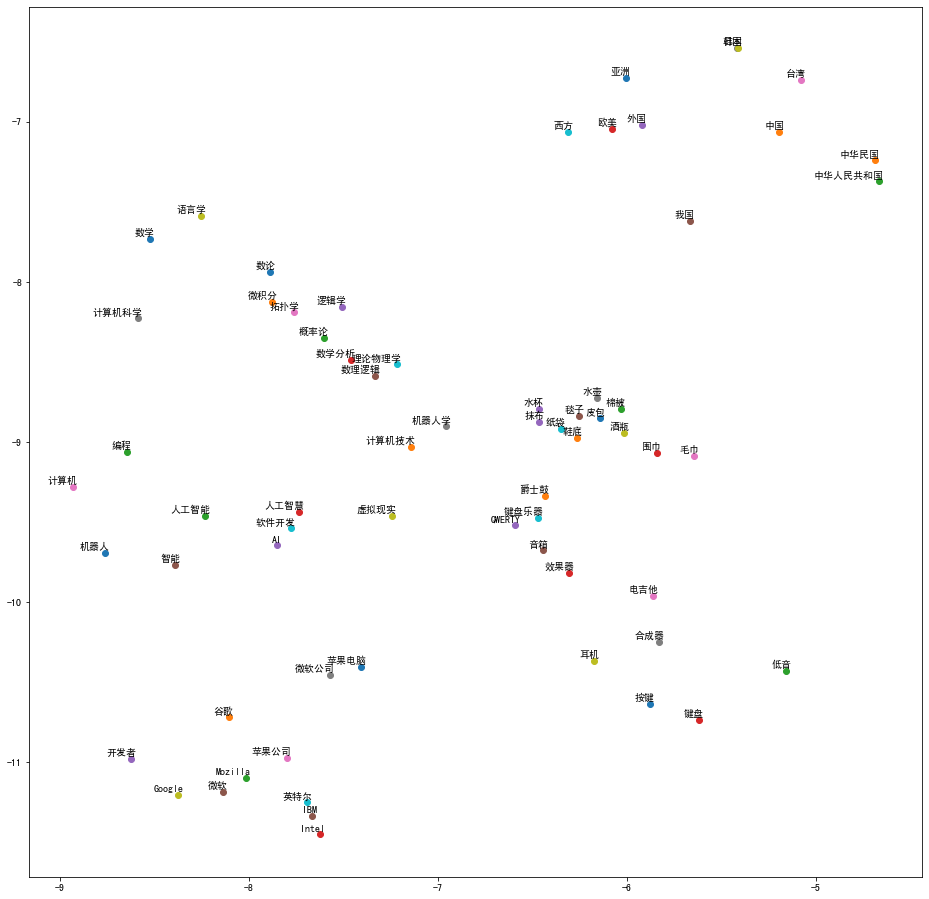

In [17]:
tsne_plot(model)

In [11]:
import matplotlib
print(matplotlib.__path__)

['C:\\Users\\wanga26\\AppData\\Local\\Continuum\\anaconda3\\envs\\cs231n\\lib\\site-packages\\matplotlib']
